Labo 5 ISD - Alexandre Jaquier et Valentin Kaelin

# 1. Régression linéaire simple

**1)** Installez la bibliothèque sklearn

In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from random import randrange, seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from copy import deepcopy
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

**2)** Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.

In [2]:
boston_dataset = load_boston()
boston_frame = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_frame['MEDV'] = boston_dataset.target

boston_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**3)** Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).  
Générez un histogramme de la distribution de la variable indépendente.

In [3]:
print(boston_frame.count())
print("-----------------------------------")
print(boston_frame.dropna().count())
print("-----------------------------------")
print(boston_frame.isnull().sum())

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


On observe donc qu'il n'y a aucune donnée manquante, ce qui nous semble réaliste étant donné que nous utilisons un dataset directement integré à la librairie ``sklearn``.

In [4]:
print(boston_frame.columns)
print(len(boston_frame.columns))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
14


Text(0, 0.5, 'Numbers of owner-occupied homes')

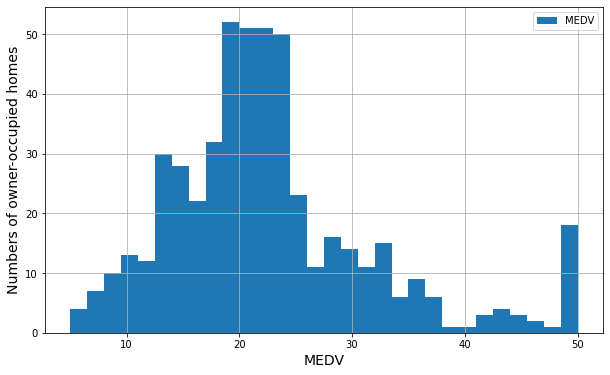

In [5]:
#print(boston_frame['MEDV'])
plot = pd.plotting.hist_series(boston_frame['MEDV'], legend=True, figsize=(10, 6), bins=30)
plot.set_title('', fontsize=15)
plot.set_xlabel('MEDV', fontsize=14)
plot.set_ylabel('Numbers of owner-occupied homes', fontsize=14)
#plot.set_yscale('log')

La distribution est unimodale et presque symétrique. 

**4)** Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.  
Commentez vos observations.

In [49]:
print(boston_frame['RAD'].median())

5.0


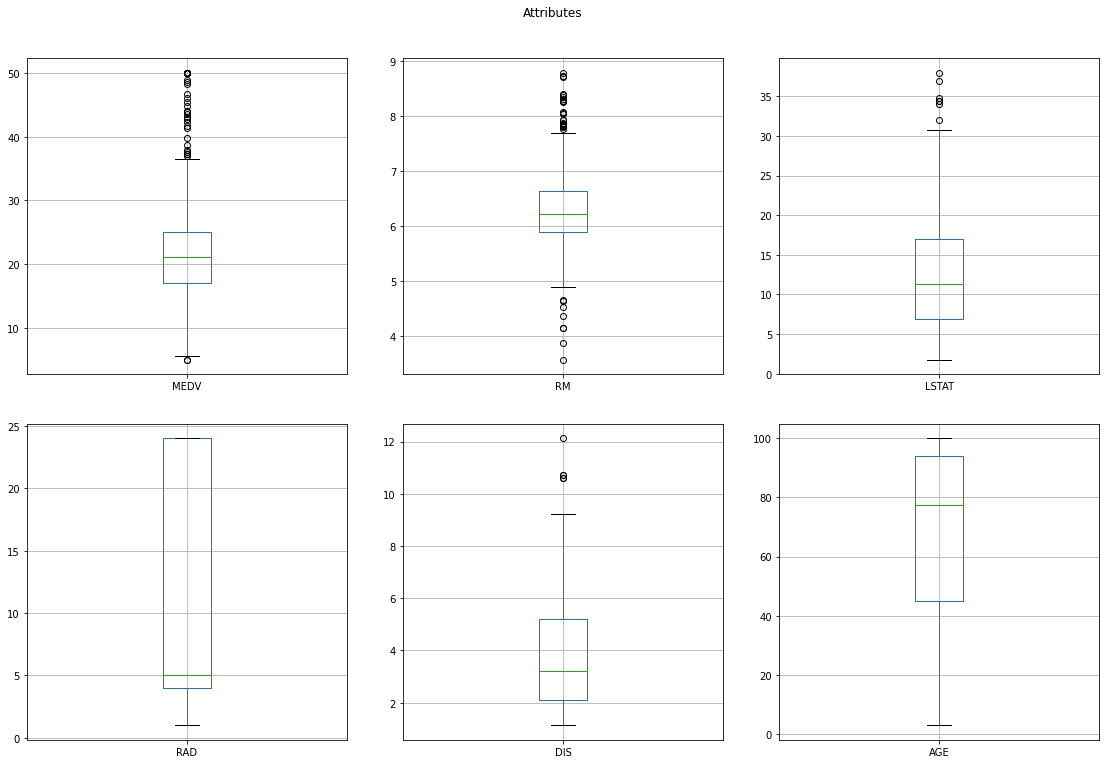

In [6]:
labels_to_show = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
columns_to_show = boston_frame[labels_to_show].columns

fig, axes = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(16, 16))
for col in range(9):
    if(col < len(columns_to_show)):
        boston_frame.boxplot(columns_to_show[col], ax=axes[col // 3, col % 3])
    else:
        fig.delaxes(axes[col // 3, col % 3])
    
fig.suptitle('Attributes')
plt.tight_layout(pad=3)

On observe que certains attributs sont mieux répartis que d'autres. L'attribut RAD par exemple n'est pas très utile car sa bougie est très étalée à cause du fait que l'attribut contiennent de très nombreuses fois sa valeur maximale.

Certains attributs comme MEDV ou RM possèdent de nombreux outliers, mais ceux-ci n'étant pas 

**5)** Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT,
chaque fois utilisant seulement une des variables.  

Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer
la performance moyenne du modèle.

Commentez vos résultats.

In [4]:
# normalisation du dataset
min_max = MinMaxScaler()
cols = boston_frame.columns.tolist()
scaled_df = min_max.fit_transform(boston_frame.values)
normalized_boston_df = pd.DataFrame(scaled_df,columns=cols)

In [5]:
seed(42)

def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

def compute_MSE(b, m, data):
    totalError = 0 # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def compute_pearson_coeff_old(predictions, ground_truth):
    sum_above = 0
    sum_below = 0
    mean = np.mean(predictions)
    
    for i in range(len(predictions)):
        sum_above += pow(ground_truth[i] - predictions[i], 2)
        sum_below += pow(ground_truth[i] - mean, 2)
    score = 1 - (sum_above / sum_below)
    return score

def compute_pearson_coeff(predictions, y_test, y_train):
    sum_above = 0
    sum_below = 0
    mean = np.mean(y_train)
    
    for i in range(len(y_test)):
        sum_above += pow(y_test[i] - predictions[i], 2)
        sum_below += pow(y_test[i] - mean, 2)
    return 1 - (sum_above / sum_below)

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]

def validation_hold_out(data, results_by_attributes, attr, n_splits, num_epochs, learning_rate):
    for i in range(n_splits):
        boston_train_validation, boston_test,  = train_test_split(data, 0.8)
        
        boston_test = pd.DataFrame(boston_test).to_numpy()
        boston_train_validation = pd.DataFrame(boston_train_validation).to_numpy()

        #Step 3: On initialise la valeur de m et de b
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        #Step 4: On applique la méthode du gradient descendant
        #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_MSE(initial_b, initial_m, data)))
        [b, m] = gradient_descent(data, initial_b, initial_m, learning_rate, num_epochs)
        
        predictions = []
        for x in boston_test[:, 0]:
            predictions.append(m * x + b)
        
        ground_truth = boston_test[:, 1]
        
        results_by_attributes[attr]['b'].append(b)
        results_by_attributes[attr]['m'].append(m)
        results_by_attributes[attr]['e'].append(compute_MSE(b, m, data))
        results_by_attributes[attr]['r'].append(compute_pearson_coeff(predictions, boston_test[:, 1], boston_train_validation[:, 1]))
        #print("After {0} epochs b = {1}, m = {2}, error = {3}, r2 = {4}".format(num_epochs, b, m, compute_MSE(b, m, data), compute_pearson_coeff(predictions, ground_truth)))

In [166]:
linear_regression_attributes = ['RM', 'RAD', 'LSTAT']
n_splits = 100

results_by_attributes = {}
for attr in linear_regression_attributes:
    results_by_attributes[attr] = {'b': [], 'm': [], 'e': [], 'r': []}

# hyper paramètres de base
num_epochs = 50
learning_rate = 0.0001

for attr in linear_regression_attributes:
    print(f'Debut {attr}...')
   
    data = normalized_boston_df[[attr, 'MEDV']].to_numpy()
    validation_hold_out(data, results_by_attributes, attr, n_splits, num_epochs, learning_rate)
    print(f'R2: {np.mean(results_by_attributes[attr]["r"])}')

print('TERMINE')

Debut RM...
R2: -5.469073965373171
Debut RAD...
R2: -6.144322353111345
Debut LSTAT...
R2: -4.662007032890906
TERMINE


On observe que les valeurs par défaut des hyper paramètres présentées dans le cours ne s'appliquent pas bien dans cet exemple. En effet nos différents coefficients de détermination linéaire ont tous des valeurs négatives, peu importe l'attribut. Ce qui nous éloigne fortement de la valeur parfaite qui est **1**. Nous allons par la suite faire varier ces hyper-paramètres pour avoir de meilleurs résultats.

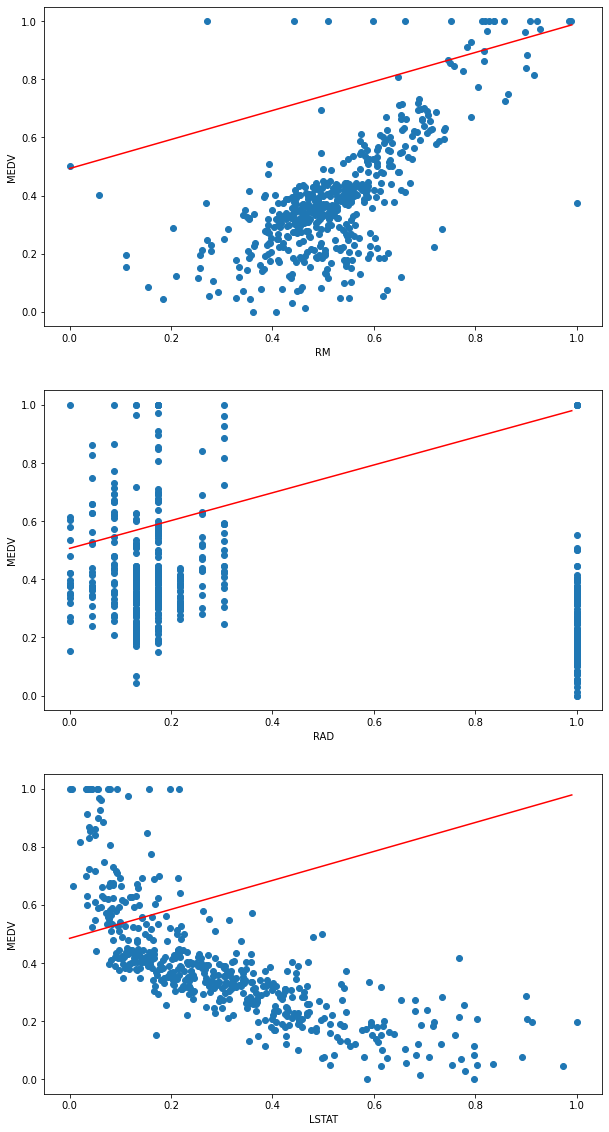

In [172]:
%matplotlib inline

fig, ax = plt.subplots(len(linear_regression_attributes), figsize=(10, 20))

for i in range(len(linear_regression_attributes)):
    attr = linear_regression_attributes[i]

    mean_b = np.mean(results_by_attributes[attr]['b'])
    mean_m = np.mean(results_by_attributes[attr]['m'])
    
    x_data = normalized_boston_df[attr]
    ax[i].scatter(x_data, normalized_boston_df['MEDV'])
    x = np.arange(0, 1, 0.01)
    ax[i].plot(x, mean_m*x + mean_b, 'r')
    ax[i].set_xlabel(attr)
    ax[i].set_ylabel('MEDV')

Comme prévu grâce à nos coefficiants R2, les droites trouvées ne correspondent pas du tout aux différentes représentations des données. Cependant, celle qui se rapproche le plus d'un résultat satisfaisant est celle du paramètre RM.

**6)** Explorez les hyper-paramètres : learning_rate et nombre d’epochs d’entraînement.
Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out.
Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. 

Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) et la ligne droite trouvée par régression linéaire.
(Note: la variable dépendante est MEDV).

In [63]:
linear_regression_attributes = ['RM', 'RAD', 'LSTAT']
n_splits = 100

results_by_learning_rate = []
results_by_attributes = {}
for attr in linear_regression_attributes:
    results_by_attributes[attr] = {'b': [], 'm': [], 'e': [], 'r': []}

# Nous faisons varier uniquement l'hyper paramètre learning rate car il a beaucoup plus d'impact sur le résultat final que
# le nombre d'epochs. En effet, une fois que le nombre d'époque est assez grand (100 dans notre cas), le résultat reste
# dans la même zone de grandeur.
num_epochs = 100
learning_rates = [0.0001, 0.1, 0.5, 1, 1.2, 1.5]

for i in range(len(learning_rates)):
    print(f'LEARNING RATE: {learning_rates[i]}')
    for attr in linear_regression_attributes:
        results_by_learning_rate.append(deepcopy(results_by_attributes))

        data = normalized_boston_df[[attr, 'MEDV']].to_numpy()
        validation_hold_out(data, results_by_learning_rate[i], attr, n_splits, num_epochs, learning_rates[i])
        print(f'{attr} Mean R2: {np.mean(results_by_learning_rate[i][attr]["r"])}')

    print('\n')
        
print('TERMINE')

LEARNING RATE: 0.0001
RM Mean R2: -5.006476682926207
RAD Mean R2: -6.373822401028161
LSTAT Mean R2: -4.635948431080446


LEARNING RATE: 0.1
RM Mean R2: 0.30406448751147563
RAD Mean R2: 0.023178093773199033
LSTAT Mean R2: -0.1367767460238437


LEARNING RATE: 0.5
RM Mean R2: 0.42925898163777326
RAD Mean R2: 0.14036300622679446
LSTAT Mean R2: 0.5102147544383898


LEARNING RATE: 1
RM Mean R2: 0.4651331320926161
RAD Mean R2: 0.150154051979907
LSTAT Mean R2: 0.5461361857155179


LEARNING RATE: 1.2
RM Mean R2: 0.482482967128824
RAD Mean R2: 0.14441664234860677
LSTAT Mean R2: 0.5479520936342429


LEARNING RATE: 1.5
RM Mean R2: 0.4672142913907894
RAD Mean R2: 0.15026960587300336
LSTAT Mean R2: 0.5392308946562921


TERMINE


In [68]:
r2_sum_by_learning_rate = defaultdict(int)

for i in range(len(learning_rates)):
    rate = learning_rates[i]

    for attr in results_by_learning_rate[i]:
        r2_sum_by_learning_rate[rate] += np.mean(results_by_learning_rate[i][attr]["r"])

# Meilleur learning rate selon les coefficients R2
best_learning_rate = max(r2_sum_by_learning_rate, key=r2_sum_by_learning_rate.get)
print(f'Meilleur learning rate: {best_learning_rate}\n')
index_best_learning_rate = learning_rates.index(best_learning_rate)

mean_r = [np.mean(results_by_learning_rate[index_best_learning_rate][attr]['r']) for attr in results_by_learning_rate[index_best_learning_rate]]
for i in range(len(mean_r)):
     print(f'{linear_regression_attributes[i]} Mean R2: {mean_r[i]}')

best_attr = max(mean_r)
index_best_attr = mean_r.index(best_attr)

print(f'\nMeilleur attribut selon la moyenne du coefficient de détermination linéaire de Pearson (R2): {linear_regression_attributes[index_best_attr]}: {best_attr}')

Meilleur learning rate: 1.2

RM Mean R2: 0.482482967128824
RAD Mean R2: 0.14441664234860677
LSTAT Mean R2: 0.5479520936342429

Meilleur attribut selon la moyenne du coefficient de détermination linéaire de Pearson (R2): LSTAT: 0.5479520936342429


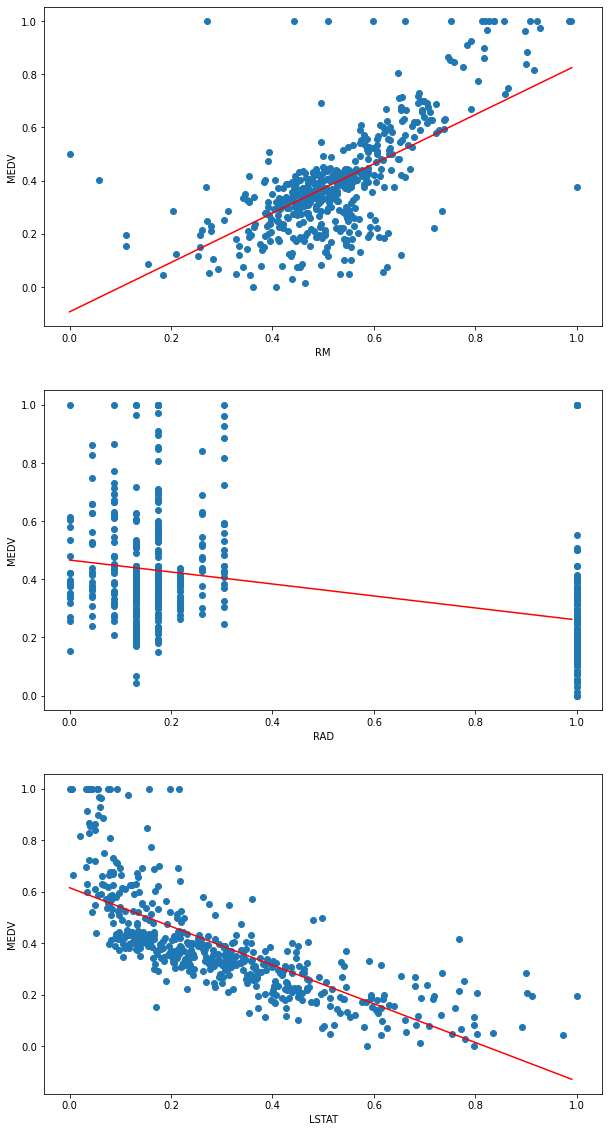

In [173]:
%matplotlib inline

fig, ax = plt.subplots(len(linear_regression_attributes), figsize=(10, 20))

best_results = results_by_learning_rate[index_best_learning_rate]

for i in range(len(linear_regression_attributes)):
    attr = linear_regression_attributes[i]

    mean_b = np.mean(best_results[attr]['b'])
    mean_m = np.mean(best_results[attr]['m'])
    
    x_data = normalized_boston_df[attr]
    ax[i].scatter(x_data, normalized_boston_df['MEDV'])
    x = np.arange(0, 1, 0.01)
    ax[i].plot(x, mean_m*x + mean_b, 'r')
    ax[i].set_xlabel(attr)
    ax[i].set_ylabel('MEDV')

**TODO** Meilleur hyper-paramètre: learning-rate vers 1 avec un nombre d'epochs assez grand (100 dans notre cas).

# 2. Régression linéaire multiple


**1)** Utilisez la bibliothèque sklearn pour entraîner un modèle de régression linéaire multiple qui exploite plusieurs variables indépendantes (p.ex. RM et LSTAT) de la base de données « Boston Housing dataset ».

In [43]:
attributes = ['RM', 'LSTAT']

x1 = boston_frame[attributes].values 
y1 = boston_frame['MEDV'].values

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.20, random_state=3)

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
y_pred = linear_regression.predict(X_test)

print(f'R2 score: {r2_score(Y_test, y_pred)}')
print(f'R2 score: {linear_regression.score(X_test, Y_test)}')

R2 score: 0.7090716783736138
R2 score: 0.7090716783736138


**2)** Utilisez la bibliothèque sklearn pour préparer les données pour faire une validation hold-out ainsi que pour le calcul du coefficient de détermination (r2_score) des modèles.

In [184]:
x1 = boston_frame[attributes].values 
y1 = boston_frame['MEDV'].values

n_splits = 100
r2_scores = np.array([])

for i in range(n_splits):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.20)

    linear_regression = LinearRegression()
    linear_regression.fit(X_train, Y_train)
    y_pred = linear_regression.predict(X_test)

    r2_scores = np.append(r2_scores, r2_score(Y_test, y_pred))
    
print(np.mean(r2_scores))

0.6354705682164656


**3)** Présentez les résultats de vos expériences (points 1 et 2) avec la base de données proposée et commentez ceux-ci.

**TODO** commentaire 

**4)** Générez un scatter-plot (valeur prédite, variable dépendante) et une ligne droite correspondant à l’équation valeur prédite = valeur dépendante (Note: la variable dépendante est MEDV).

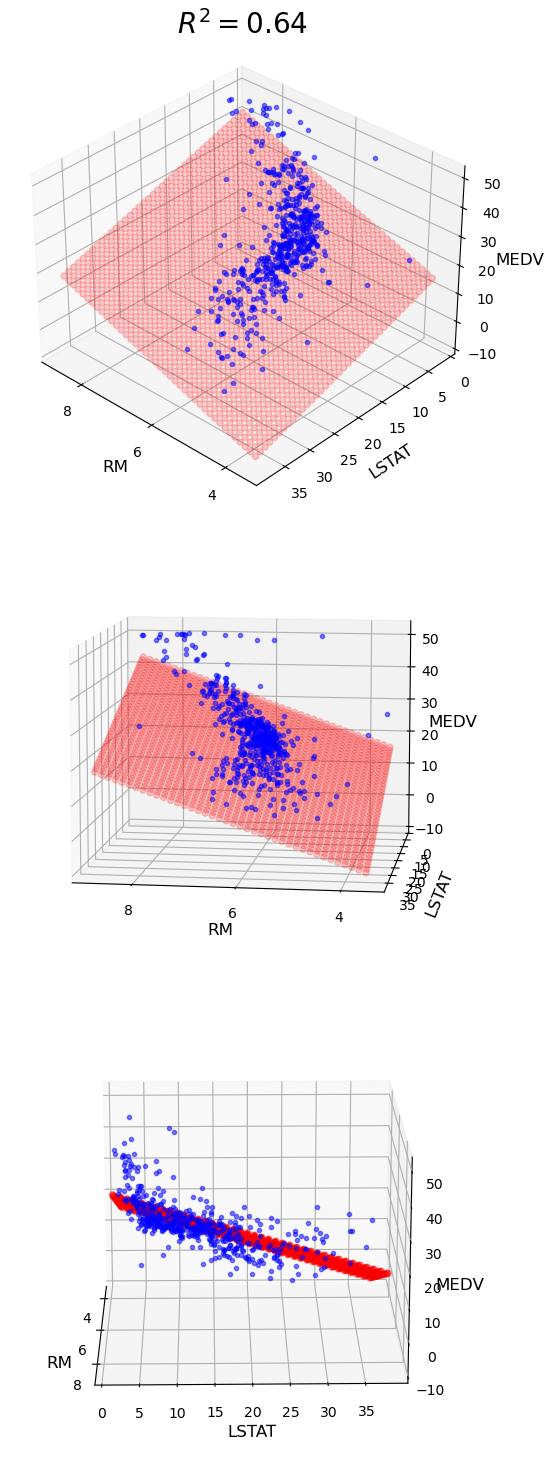

In [223]:
## Code fortement inspiré de cet article: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

# Afin de rendre les graphiques dynamiques, remplacer "inline" par "qt" sur la ligne suivante:
%matplotlib inline 

attributes = ['RM', 'LSTAT']
X = boston_frame[attributes].values 
Y = boston_frame['MEDV'].values

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(boston_frame['RM'].min(), boston_frame['RM'].max(), 40)   # range of RM values
y_pred = np.linspace(boston_frame['LSTAT'].min(), boston_frame['LSTAT'].max(), 40)  # range of LSTAT values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(24, 15))

ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='b', zorder=15, linestyle='none', marker='.', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor='r', alpha=0.2)
    ax.set_xlabel('RM', fontsize=12)
    ax.set_ylabel('LSTAT', fontsize=12)
    ax.set_zlabel('MEDV', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=33, azim=133)
ax2.view_init(elev=9, azim=98)
ax3.view_init(elev=17, azim=-1)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()